<a href="https://colab.research.google.com/github/bkn872/GL_Hackathon/blob/main/Socio_Economic11_09_2022_1300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MegaHacakthon - Voksedigital**

Socio-Economic Segregation on the basis of earnings is done by various government bodies across the world by doing a poll which can be "door to door" or "online based" to identify/

# **About:**

Socio-Economic Segregation on the basis of earnings is done by various government bodies across the world by doing a poll which can be
"door to door" or "online based" to identify/keep a check on the sections of society having lower levels of income.

Similarly in the US, it is a requirement for the federal bodies to be cognizant of people's income which falls under a 
threshold so that decisions taken on various fronts can be inclusive and without ambiguity. For this reason 
few federal bodies like the "Bureau Of Economic Analysis" outsource their masked data to 3rd party companies who are kept on contract to analyze the 
data to garner detailed insights and come up with different sets of best 
models to:

1) decide on a threshold value that can act as a good classification boundary condition.

2) to classify the people in the database based upon this threshold value.

For that reason, you are hired by one such company as an "Analyst" and are provided with the threshold value 
which is decided to be $50k/year.  
The task expected from you is to :

1) perform a detailed EDA to garner insights that can be helpful for the stakeholders.

2) to classify all the people who earn more or less than $50k/year based upon their various demographical features

   by building a generalizable classification model.

Data Dictionary :
------------------

1) index		-	Index No/Row No

2) year_of_poll		-	Year for the conducted poll

3) own_self_emp		-	Business Status( Unemployed - 0 , Business Owned - 1 , Self Employed - 2)

4) veteran benefits	-	Veteran Benefits (0 - No Benefits, 1 - Cadre1 Benefits, 2- Cadre2 Benefits)	

5) currently_enrolled	-	Current enrolled in college/school.

6) race			-	Race of people in the poll

7) father_country	-	Birth country of father 

8) educ			-	Specific education status 

9) house_stat		-	Demography in person's house 

10) major_ind_code	-	Different Industries where a person is working 

11) labour_union	-	Member of Labour Union 

12) self_country	-	Country of oneself

13) major_occ_code	-	Occupation a person performs in specific industry 

14) age			-	age of a person

15) mother_country	-	Birth country of mother 

16) house_summary	-	detailed household summary

17) gender		-	Gender of a person

18) hisp_origin		-	Origins of people in South America

19) gains		-	capital gains on investments

20) dividends		-	dividends earned from stocks 

21) marriage_status	-	Current marital status

22) losses		-   	capital losses on investments

23) employer_of		-	Number of people employed under an employer

24) house_1yr_ago	-	Living in house for under 1 yr

25) income_filled	-	Income filled for tax

26) weeks_worked	-	weeks worked in year

27) under18		-	family members under 18

28) hourly_wage		-	wage earned hourly

29) unemp_reason	- 	reason for unemployment 

30) citizenship		-	Citizenship of a person ( ' Foreign born- Not a citizen of U S ':'FB',	' Native- Born in Puerto Rico or U S Outlying':'NB_PR',' Native- Born in the United States':'NB_US',' Foreign born- U S citizen by naturalization':'FB_US',' Native- Born abroad of American Parent(s)':'NB_US_Parents') 

31) woker_type		-	Kind of worker 

32) fed_liability	-	Federal tax liability for people 

33) full_partime_job	-	type of full/part-time job

34) income		-	Less/More than 50k$ yearly

In [1]:
#datafranme related libraries
import pandas as pd
import numpy as np
#visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

#model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.width', 500)


In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
test_data=pd.read_csv('/content/drive/My Drive/Python/Socio_Economics/test.csv')
test_data.shape

(42000, 33)

In [4]:
train_data=pd.read_csv('/content/drive/My Drive/Python/Socio_Economics/train.csv')
train_data.shape

(105000, 34)

In [5]:
train_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,0,1,2,3,4,5,6,7,8,9
year_of_poll,2004,2005,2004,2004,2004,2004,2005,2004,2005,2005
own_self_emp,0,0,0,0,0,0,0,0,0,0
veteran benefits,2,0,2,2,2,0,2,2,2,2
currently_enrolled,High school,College/University,NaN,College/University,NaN,NaN,College/University,High school,College/University,High school
race,White,White,White,Amer/Indian/Aleut/Eskimo,White,White,White,White,White,White
father_country,United-States,Japan,United-States,United-States,United-States,Mexico,United-States,United-States,United-States,Puerto-Rico
educ,Associates degree-academic program,Children,Some college but no degree,High school graduate,High school graduate,Children,Some college but no degree,High school graduate,10th grade,Some college but no degree
house_stat,Householder,Child <18 never marr not in subfamily,Secondary individual,Householder,Householder,Child <18 never marr not in subfamily,Child 18+ never marr Not in a subfamily,Spouse of householder,Householder,Spouse of householder
major_ind_code,Business and repair services,Not in universe or children,Manufacturing-durable goods,Wholesale trade,Wholesale trade,Not in universe or children,Entertainment,Construction,Business and repair services,Not in universe or children


In [6]:
train_data['income'].value_counts()

Less than 50K $    65272
More than 50K $    39728
Name: income, dtype: int64

In [7]:
train_data['income']=train_data['income'].replace({'Less than 50K $':0,'More than 50K $':1})
train_data

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,2005,2,2,NaN,White,United-States,High school graduate,Householder,Not in universe or children,...,Yes,47,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Not in labor force,1
104996,104996,2004,0,0,College/University,White,United-States,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1
104997,104997,2004,0,2,NaN,White,United-States,High school graduate,Nonfamily householder,Manufacturing-nondurable goods,...,NaN,47,NaN,1693.2,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
104998,104998,2005,0,2,NaN,White,Italy,High school graduate,Nonfamily householder,Not in universe or children,...,NaN,0,NaN,0.0,NaN,NB_US,NaN,Nonfiler,Not in labor force,1


In [8]:
data=train_data.copy()

In [9]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        print(feature)
        #cdata[feature] = pd.Categorical(cdata[feature])# Replace strings with an integer
#cdata.head(10)

currently_enrolled
race
father_country
educ
house_stat
major_ind_code
labour_union
self_country
major_occ_code
mother_country
house_summary
gender
hisp_origin
marriage_status
house_1yr_ago
income_filled
under18
unemp_reason
citizenship
woker_type
fed_liability
full_partime_job


In [10]:
data.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,1
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,1
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,1


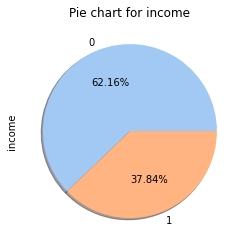

In [52]:
col='income'
colors = sns.color_palette('pastel')[0:5]
plt.title("Pie chart for "+ col)
train_data[col].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, colors=colors)
plt.show()

In [69]:
new_data_train=train_data.copy()
new_data_test=test_data.copy()

In [70]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        print(feature)
        print(data[feature].value_counts())

currently_enrolled
College/University    42386
 High school          31171
Name: currently_enrolled, dtype: int64
race
 White                      88078
 Black                      10763
Asian/Pacific_Islander       3050
 Other                       1935
Amer/Indian/Aleut/Eskimo     1174
Name: race, dtype: int64
father_country
 United-States                   83720
 Mexico                           5297
 ?                                3523
 Puerto-Rico                      1455
 Italy                            1189
 Germany                           741
 Canada                            704
 Dominican-Republic                679
 Poland                            645
 Philippines                       616
 Cuba                              593
 El-Salvador                       519
 China                             434
 England                           403
 Columbia                          320
 South Korea                       288
 India                             280
 Ireland

In [71]:
oneHotCols=[]

In [72]:
train_data['currently_enrolled'].value_counts()

College/University    42386
 High school          31171
Name: currently_enrolled, dtype: int64

In [73]:
train_data['race'].value_counts()

 White                      88078
 Black                      10763
Asian/Pacific_Islander       3050
 Other                       1935
Amer/Indian/Aleut/Eskimo     1174
Name: race, dtype: int64

In [74]:
List=(train_data['father_country'].value_counts())
List

 United-States                   83720
 Mexico                           5297
 ?                                3523
 Puerto-Rico                      1455
 Italy                            1189
 Germany                           741
 Canada                            704
 Dominican-Republic                679
 Poland                            645
 Philippines                       616
 Cuba                              593
 El-Salvador                       519
 China                             434
 England                           403
 Columbia                          320
 South Korea                       288
 India                             280
 Ireland                           258
 Jamaica                           247
 Vietnam                           242
 Guatemala                         239
 Japan                             209
 Ecuador                           197
 Portugal                          197
 Haiti                             193
 Nicaragua               

In [75]:
train_data['educ'].value_counts()

 High school graduate                      25608
 Children                                  24831
 Some college but no degree                14637
 Bachelors degree(BA AB BS)                10403
 7th and 8th grade                          4239
 10th grade                                 3962
 11th grade                                 3611
 Masters degree(MA MS MEng MEd MSW MBA)     3471
 9th grade                                  3275
 Associates degree-occup /vocational        2857
 Associates degree-academic program         2289
 5th or 6th grade                           1735
 12th grade no diploma                      1082
 1st 2nd 3rd or 4th grade                    963
 Prof school degree (MD DDS DVM LLB JD)      937
 Doctorate degree(PhD EdD)                   651
 Less than 1st grade                         449
Name: educ, dtype: int64

In [76]:
train_data['house_stat'].value_counts()

 Householder                                        28081
 Child <18 never marr not in subfamily              26380
 Spouse of householder                              21940
 Nonfamily householder                              11728
 Child 18+ never marr Not in a subfamily             6320
 Secondary individual                                3224
 Other Rel 18+ ever marr not in subfamily             997
 Grandchild <18 never marr child of subfamily RP      980
 Other Rel 18+ never marr not in subfamily            929
 Child 18+ ever marr Not in a subfamily               547
 Grandchild <18 never marr not in subfamily           542
 Child under 18 of RP of unrel subfamily              390
 RP of unrelated subfamily                            388
 Other Rel 18+ ever marr RP of subfamily              386
 Child 18+ ever marr RP of subfamily                  350
 Other Rel <18 never marr child of subfamily RP       348
 Other Rel <18 never marr not in subfamily            316
 Other Rel 18+

In [77]:
train_data["major_ind_code"].value_counts()

 Not in universe or children            53055
 Retail trade                            8889
 Manufacturing-durable goods             4805
 Education                               4307
 Manufacturing-nondurable goods          3705
 Finance insurance and real estate       3178
 Construction                            3178
 Business and repair services            2962
 Medical except hospital                 2484
 Public administration                   2416
 Other professional services             2373
 Transportation                          2157
 Hospital services                       2086
 Wholesale trade                         1858
 Agriculture                             1630
 Personal services except private HH     1541
 Social services                         1336
 Entertainment                            846
 Communications                           655
 Utilities and sanitary services          608
 Private household services               517
 Mining                           

In [78]:
train_data["major_ind_code"].value_counts()

 Not in universe or children            53055
 Retail trade                            8889
 Manufacturing-durable goods             4805
 Education                               4307
 Manufacturing-nondurable goods          3705
 Finance insurance and real estate       3178
 Construction                            3178
 Business and repair services            2962
 Medical except hospital                 2484
 Public administration                   2416
 Other professional services             2373
 Transportation                          2157
 Hospital services                       2086
 Wholesale trade                         1858
 Agriculture                             1630
 Personal services except private HH     1541
 Social services                         1336
 Entertainment                            846
 Communications                           655
 Utilities and sanitary services          608
 Private household services               517
 Mining                           

In [79]:
replaceStruct = {
                "currently_enrolled":     {"College/University": 1, " High school": 2,"":3," ":4},
                
                "race":     {" White": 1, " Black": 2, "Asian/Pacific_Islander":3," Other":4,"Amer/Indian/Aleut/Eskimo":5,},
                
                "father_country":     {" United-States":1," Japan":2," Mexico":3," Puerto-Rico":4," Germany":5," Philippines":6," Haiti":7," Canada":8," Dominican-Republic":9," Italy":10," Guatemala":11," Poland":12," ?":13," Cuba":14," Hungary":15," Nicaragua":16," England":17," China":18," Vietnam":19," Cambodia":20," El-Salvador":21," Ireland":22," South Korea":23," Portugal":24," Peru":25," Scotland":26," Laos":27," India":28," Yugoslavia":29," Greece":30," Columbia":31," Iran":32," Ecuador":33," France":34," Honduras":35," Jamaica":36," Outlying-U S (Guam USVI etc)":37," Taiwan":38," Thailand":39," Trinadad&Tobago":40," Hong Kong":41," Holand-Netherlands":42," Panama":43,},
               
                "educ":     {" Associates degree-academic program":1," Children":2," Some college but no degree":3," High school graduate":4," 10th grade":5," Prof school degree (MD DDS DVM LLB JD)":6," Bachelors degree(BA AB BS)":7," 7th and 8th grade":8," 5th or 6th grade":9," 9th grade":10," 11th grade":11," Masters degree(MA MS MEng MEd MSW MBA)":12," Associates degree-occup /vocational":13," 1st 2nd 3rd or 4th grade":14," Less than 1st grade":15," 12th grade no diploma":16," Doctorate degree(PhD EdD)":17,},
                
                "house_stat":{" Householder":1," Child <18 never marr not in subfamily":2," Secondary individual":3," Child 18+ never marr Not in a subfamily":4," Spouse of householder":5," Nonfamily householder":6," Other Rel 18+ never marr not in subfamily":7," Child 18+ never marr RP of subfamily":8," Child 18+ ever marr RP of subfamily":9," Other Rel <18 never marr not in subfamily":10," Other Rel 18+ ever marr not in subfamily":11," RP of unrelated subfamily":12," Other Rel <18 never marr child of subfamily RP":13," Child under 18 of RP of unrel subfamily":14," Grandchild <18 never marr child of subfamily RP":15," Other Rel 18+ spouse of subfamily RP":16," Grandchild <18 never marr not in subfamily":17," Child <18 never marr RP of subfamily":18," Other Rel 18+ ever marr RP of subfamily":19," Child <18 ever marr RP of subfamily":20," Child 18+ ever marr Not in a subfamily":21," Child 18+ spouse of subfamily RP":22," Grandchild 18+ never marr not in subfamily":23," In group quarters":24," Other Rel 18+ never marr RP of subfamily":25," Spouse of RP of unrelated subfamily":26," Grandchild 18+ ever marr not in subfamily":27," Grandchild 18+ ever marr RP of subfamily":28," Child <18 ever marr not in subfamily":29,"":30," ":31,
                              " Grandchild 18+ spouse of subfamily RP":32," Other Rel <18 never married RP of subfamily":33,},
                 
                "major_ind_code":     {" Business and repair services":1," Not in universe or children":2," Manufacturing-durable goods":3," Wholesale trade":4," Entertainment":5," Construction":6," Hospital services":7," Finance insurance and real estate":8," Personal services except private HH":9," Retail trade":10," Other professional services":11," Communications":12," Manufacturing-nondurable goods":13," Agriculture":14," Education":15," Private household services":16," Public administration":17," Medical except hospital":18," Armed Forces":19," Social services":20," Transportation":21," Forestry and fisheries":22," Mining":23," Utilities and sanitary services":24,},
                 
                "self_country":     {" United-States":1," Germany":2," Puerto-Rico":3," Philippines":4," Mexico":5," ?":6," Guatemala":7," Cuba":8," Italy":9," Vietnam":10," China":11," Canada":12," El-Salvador":13," Ireland":14," Dominican-Republic":15," South Korea":16," Portugal":17," Peru":18," Thailand":19," Taiwan":20," Japan":21," Haiti":22," Columbia":23," India":24," Cambodia":25," France":26," Poland":27," England":28," Outlying-U S (Guam USVI etc)":29," Scotland":30," Iran":31," Nicaragua":32," Honduras":33," Jamaica":34," Ecuador":35," Greece":36," Hong Kong":37," Hungary":38," Trinadad&Tobago":39," Yugoslavia":40," Laos":41," Holand-Netherlands":42," Panama":43,},
                 
                "major_occ_code":     {" Protective services":1,"":2," Machine operators assmblrs & inspctrs":3," Handlers equip cleaners etc ":4," Executive admin and managerial":5," Professional specialty":6," Adm support including clerical":7," Other service":8," Sales":9," Precision production craft & repair":10," Technicians and related support":11," Transportation and material moving":12," Farming forestry and fishing":13," Private household services":14," Armed Forces":15," ":16,},
                
                "mother_country":     {" United-States":1," Puerto-Rico":2," Philippines":3," Haiti":4," Mexico":5," Dominican-Republic":6," ?":7," Guatemala":8," Italy":9," Cuba":10," Canada":11," El-Salvador":12," Hungary":13," Nicaragua":14," England":15," Vietnam":16," China":17," Peru":18," Germany":19," Greece":20," Ireland":21," Poland":22," Japan":23," Yugoslavia":24," South Korea":25," Trinadad&Tobago":26," Portugal":27," Laos":28," Scotland":29," India":30," Columbia":31," Iran":32," France":33," Cambodia":34," Outlying-U S (Guam USVI etc)":35," Honduras":36," Jamaica":37," Ecuador":38," Thailand":39," Taiwan":40," Hong Kong":41," Holand-Netherlands":42," Panama":43,},
                
                "house_summary":     {" Householder":1,"Child_U18_Unmarried":2,"Non_Relative":3,"Child_Above18":4,"Spouse":5,"Relative":6,"Child_U18_Married":7,"Sy_Individual":8,},
                
                "gender":      {"M":1,"F":2,},
                
                "hisp_origin":  { "All_Other":1,"Mex_Amer":2," Chicano":3,"Puer_Ric":4,"Other_Spanish":5,"Central/South_American":6," Cuban":7,"Mexican_Mexicano":8," NA":9," Do not know":10,},
                
                "marriage_status":  {"Married_civilian_Sp_Pr":1,"Unmarried":2," Divorced":3," Widowed":4,"Married_AF_Sp_Pr":5,"Married_Sp_Ab":6," Separated":7,},
                 
                "house_1yr_ago":     {" No":1,"":2," Yes":3," ":4,},
                 
                "income_filled":  {" No":1," Yes":2,"":3,},
                 
                "under18":     {"":1,"Both_Pr":2,"Only_Mom":3,"Only_Dad":4,"Both_Ab":5," ":6,},   
                 
                "unemp_reason":  { "":1,"Job loser_Other":2," Job leaver":3," Re-entrant":4," New entrant":5,"Job loser_layoff":6," ":7,},
                 
                "citizenship":  { "NB_US":1,"NB_US_Parents":2,"NB_PR":3,"FB":4,"FB_US":5,},  
                 
                "woker_type":   {"Pvt":1,"":2,"St_Govt":3,"Loc_Govt":4,"Fed_Govt":5,"Self_emp_not_inc":6,"Self_emp_inc":7," Never worked":8," Without pay":9," ":10,},
                 
                "fed_liability": {"Joint_both_under65":1," Nonfiler":2," Single":3,"Joint_both_Above65":4," Head of household":5,"Joint_one_Under65_one_Above65":6,},
                 
                "full_partime_job": {"Children/Armed_Forces":1," Full-time schedules":2," Not in labor force":3,"":4," PT for econ reasons usually PT":5," PT for non-econ reasons usually FT":6," Unemployed full-time":7," Unemployed part- time":8," PT for econ reasons usually FT":9," ":10,},

                 "labour_union":{"no":1,"yes":2,"":3," ":4},  
                   
                    }

In [80]:
new_data_train=train_data.copy()
new_data_test=test_data.copy()


In [81]:
encoded_train_data=new_data_train.replace(replaceStruct)
encoded_train_data=pd.get_dummies(encoded_train_data, columns=oneHotCols)



In [82]:
encoded_train_data.dtypes

ID                      int64
year_of_poll            int64
own_self_emp            int64
veteran benefits        int64
currently_enrolled    float64
race                    int64
father_country          int64
educ                    int64
house_stat            float64
major_ind_code          int64
labour_union          float64
self_country            int64
major_occ_code        float64
age                     int64
mother_country          int64
house_summary           int64
gender                  int64
hisp_origin             int64
gains                 float64
dividends             float64
marriage_status         int64
losses                float64
employer_of             int64
house_1yr_ago         float64
income_filled         float64
weeks_worked            int64
under18               float64
hourly_wage           float64
unemp_reason          float64
citizenship             int64
woker_type            float64
fed_liability           int64
full_partime_job      float64
income    

In [121]:
encoded_train_data['labour_union'].value_counts


<bound method IndexOpsMixin.value_counts of 0         1.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
104995    2.0
104996    2.0
104997    1.0
104998    1.0
104999    1.0
Name: labour_union, Length: 105000, dtype: float64>

In [122]:
encoded_train_data['house_stat'].value_counts()

1.0     28081
2.0     26380
5.0     21940
6.0     11728
4.0      6320
3.0      3224
11.0      997
15.0      980
7.0       929
21.0      547
17.0      542
14.0      390
12.0      388
19.0      386
9.0       350
13.0      348
10.0      316
16.0      308
8.0       308
23.0      195
24.0      108
22.0       64
18.0       46
25.0       45
26.0       23
27.0       19
29.0       14
0.0        11
28.0        5
20.0        3
32.0        3
33.0        2
Name: house_stat, dtype: int64

In [124]:
data.shape

(105000, 34)

In [125]:
import imblearn
print(imblearn.__version__)

0.8.1


In [126]:
for feature in encoded_train_data.columns: # Loop through all columns in the dataframe
    if encoded_train_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        print(feature)
        print(encoded_train_data[feature].value_counts())

In [127]:
encoded_train_data.isna().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
major_occ_code        0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
house_1yr_ago         0
income_filled         0
weeks_worked          0
under18               0
hourly_wage           0
unemp_reason          0
citizenship           0
woker_type            0
fed_liability         0
full_partime_job      0
income                0
dtype: int64

In [128]:
# encoded_train_data["currently_enrolled"]=encoded_train_data["currently_enrolled"].astype('int64')
# #encoded_train_data["major_occ_code"]=encoded_train_data["major_occ_code"].astype('int')
# encoded_train_data["gains"]=encoded_train_data["gains"].astype('int64')
# encoded_train_data["dividends"]=encoded_train_data["dividends"].astype('int64')
# encoded_train_data["losses"]=encoded_train_data["losses"].astype('int64')
# #encoded_train_data["house_1yr_ago"].astype('int64')
# #encoded_train_data["income_filled"].astype('int64')
# #encoded_train_data["under18"].astype('int64')

# encoded_train_data["hourly_wage"]=encoded_train_data["hourly_wage"].astype('int64')
# #encoded_train_data["unemp_reason"].astype('int64')
# #encoded_train_data["woker_type"].astype('int64')
# #encoded_train_data["full_partime_job"].astype('int64')

In [129]:
encoded_train_data["major_occ_code"].value_counts()

0.0     53055
7.0      7708
6.0      7320
5.0      6517
8.0      6365
9.0      6112
10.0     5604
3.0      3414
4.0      2180
12.0     2112
13.0     1686
11.0     1604
1.0       871
14.0      431
15.0       21
Name: major_occ_code, dtype: int64

In [130]:
encoded_train_data.isnull().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
major_occ_code        0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
house_1yr_ago         0
income_filled         0
weeks_worked          0
under18               0
hourly_wage           0
unemp_reason          0
citizenship           0
woker_type            0
fed_liability         0
full_partime_job      0
income                0
dtype: int64

In [131]:
#encoded_train_data.dtypes

In [132]:
# encoded_train_data['currently_enrolled']=encoded_train_data['currently_enrolled'].fillna(value=encoded_train_data['currently_enrolled'].median(),inplace=True)
# encoded_train_data['labour_union']=encoded_train_data['labour_union'].fillna(value=encoded_train_data['labour_union'].median(),inplace=True)
# encoded_train_data['house_stat']=encoded_train_data['house_stat'].fillna(value= encoded_train_data['house_stat'].median(),inplace=True)
# encoded_train_data['major_occ_code']=encoded_train_data['major_occ_code'].fillna(value= encoded_train_data['major_occ_code'].median(),inplace=True)
# encoded_train_data['house_1yr_ago']=encoded_train_data['house_1yr_ago'].fillna(value= encoded_train_data['house_1yr_ago'].median(),inplace=True)
# encoded_train_data['income_filled']=encoded_train_data['income_filled'].fillna(value= encoded_train_data['income_filled'].median(),inplace=True)
# encoded_train_data['under18']=encoded_train_data['under18'].fillna(value=encoded_train_data['under18'].median(),inplace=True)
# encoded_train_data['unemp_reason']=encoded_train_data['unemp_reason'].fillna(value=encoded_train_data['unemp_reason'].median(),inplace=True)
# encoded_train_data['woker_type']=encoded_train_data['woker_type'].fillna(value= encoded_train_data['woker_type'].median())
# encoded_train_data['full_partime_job']=encoded_train_data['full_partime_job'].fillna(value= encoded_train_data['full_partime_job'].median(),inplace=True)


In [134]:
encoded_train_data=encoded_train_data.replace(np.nan,0)
encoded_train_data

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,2.0,1,1,1,1.0,1,...,1.0,47,0.0,0.0,0.0,1,1.0,1,1.0,1
1,1,2005,0,0,1.0,1,2,2,2.0,2,...,1.0,0,2.0,0.0,0.0,1,0.0,2,1.0,1
2,2,2004,0,2,0.0,1,1,3,3.0,3,...,2.0,47,0.0,0.0,0.0,1,1.0,3,1.0,1
3,3,2004,0,2,1.0,5,1,4,1.0,4,...,0.0,47,0.0,0.0,0.0,1,1.0,1,1.0,1
4,4,2004,0,2,0.0,1,1,4,1.0,4,...,0.0,47,0.0,0.0,0.0,1,1.0,3,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,2005,2,2,0.0,1,1,4,1.0,2,...,2.0,47,0.0,0.0,0.0,1,0.0,2,3.0,1
104996,104996,2004,0,0,1.0,1,1,2,2.0,2,...,1.0,0,2.0,0.0,0.0,1,0.0,2,1.0,1
104997,104997,2004,0,2,0.0,1,1,4,6.0,13,...,0.0,47,0.0,1693.2,0.0,1,1.0,3,1.0,1
104998,104998,2005,0,2,0.0,1,10,4,6.0,2,...,0.0,0,0.0,0.0,0.0,1,0.0,2,3.0,1


In [135]:
X = encoded_train_data.drop(labels= ['income'] , axis = 1)
y = encoded_train_data["income"]
X.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,0,2004,0,2,2.0,1,1,1,1.0,1,...,1.0,1.0,47,0.0,0.0,0.0,1,1.0,1,1.0
1,1,2005,0,0,1.0,1,2,2,2.0,2,...,0.0,1.0,0,2.0,0.0,0.0,1,0.0,2,1.0
2,2,2004,0,2,0.0,1,1,3,3.0,3,...,1.0,2.0,47,0.0,0.0,0.0,1,1.0,3,1.0
3,3,2004,0,2,1.0,5,1,4,1.0,4,...,3.0,0.0,47,0.0,0.0,0.0,1,1.0,1,1.0
4,4,2004,0,2,0.0,1,1,4,1.0,4,...,3.0,0.0,47,0.0,0.0,0.0,1,1.0,3,1.0


In [136]:
X.shape

(105000, 33)

In [137]:
y.shape

(105000,)

In [138]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [139]:
X_resampled.shape

(130544, 33)

In [140]:
y_resampled.shape

(130544,)

In [141]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((104435, 33), (26109, 33), (104435,), (26109,))

In [142]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((84000, 33), (21000, 33), (84000,), (21000,))

In [143]:
X_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
9231,9231,2005,2,2,2.0,1,1,11,3.0,6,...,0.0,1.0,15,0.0,0.0,0.0,1,1.0,3,6.0
11872,11872,2005,0,2,2.0,2,1,5,2.0,2,...,0.0,1.0,0,2.0,0.0,0.0,1,0.0,2,3.0
13085,13085,2005,0,2,1.0,1,1,17,1.0,3,...,0.0,1.0,47,0.0,0.0,0.0,1,1.0,5,2.0
33771,33771,2005,0,2,1.0,1,1,3,3.0,10,...,0.0,1.0,27,0.0,0.0,0.0,1,1.0,2,2.0
53681,53681,2004,0,2,1.0,1,1,3,5.0,2,...,1.0,2.0,27,0.0,0.0,0.0,1,0.0,1,1.0


In [145]:
std_col_names=X.columns

In [146]:
std_col_names

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job'],
      dtype='object')

In [147]:
std_col_names=std_col_names.drop('ID')

In [148]:
X_train.set_index('ID', inplace=True)
X_valid.set_index('ID', inplace=True)

In [149]:
X_train.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
ID,,,,,,,,,,,,,,,,,,,,,
9231,2005,2,2,2.0,1,1,11,3.0,6,0.0,...,0.0,1.0,15,0.0,0.0,0.0,1,1.0,3,6.0
11872,2005,0,2,2.0,2,1,5,2.0,2,1.0,...,0.0,1.0,0,2.0,0.0,0.0,1,0.0,2,3.0
13085,2005,0,2,1.0,1,1,17,1.0,3,0.0,...,0.0,1.0,47,0.0,0.0,0.0,1,1.0,5,2.0
33771,2005,0,2,1.0,1,1,3,3.0,10,1.0,...,0.0,1.0,27,0.0,0.0,0.0,1,1.0,2,2.0
53681,2004,0,2,1.0,1,1,3,5.0,2,1.0,...,1.0,2.0,27,0.0,0.0,0.0,1,0.0,1,1.0


In [150]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index,columns = X_train.columns)
X_valid_std = pd.DataFrame(sc.fit_transform(X_valid),index=X_valid.index,columns = X_valid.columns)
#X_train_std=sc.fit_transform(X_train)
#X_test_std=sc.fit_transform(X_test)

In [151]:
X_train_std.head()

,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,...,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
ID,,,,,,,,,,,,,,,,,,,,,
9231,0.998026,3.286827,0.567717,1.300086,-0.368136,-0.362867,1.615360,-0.220985,-0.042156,-1.236490,...,-0.917736,0.227481,-0.267276,-0.582790,-0.203618,-0.165032,-0.344774,-0.023555,0.755629,3.428025
11872,0.998026,-0.317597,0.567717,1.300086,1.056315,-0.362867,-0.053948,-0.505296,-0.724255,0.386023,...,-0.917736,0.227481,-0.947950,1.192173,-0.203618,-0.165032,-0.344774,-0.605170,-0.110244,1.045463
13085,0.998026,-0.317597,0.567717,0.005395,-0.368136,-0.362867,3.284668,-0.789608,-0.553730,-1.236490,...,-0.917736,0.227481,1.184829,-0.582790,-0.203618,-0.165032,-0.344774,-0.023555,2.487376,0.251275
33771,0.998026,-0.317597,0.567717,0.005395,-0.368136,-0.362867,-0.610384,-0.220985,0.639943,0.386023,...,-0.917736,0.227481,0.277263,-0.582790,-0.203618,-0.165032,-0.344774,-0.023555,-0.110244,0.251275
53681,-1.001978,-0.317597,0.567717,0.005395,-0.368136,-0.362867,-0.610384,0.347639,-0.724255,0.386023,...,-0.221055,1.732439,0.277263,-0.582790,-0.203618,-0.165032,-0.344774,-0.605170,-0.976118,-0.542912


Modelling + HyperParameter Tuning

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [153]:
colnames = ['accuracy','accuracy_cv_score','accuracy_cv_stddev',
                'precision_score','recall_score','f1_score',
                'roc_auc_score (cross_val_score)']
model_scores = []
model_stats = {}
model_columns=['accuracy','accuracy_mean_score','accuracy_stdfev','precision','recall','f1_score']

In [154]:
model_scores = []

percentage of Null values in Train Data

In [101]:
# For missing data
percent_missing = train_data.isnull().sum() * 100 / len(train_data)
missing_value_df = pd.DataFrame({'column_name': train_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
ID,ID,0.000000
year_of_poll,year_of_poll,0.000000
own_self_emp,own_self_emp,0.000000
veteran benefits,veteran benefits,0.000000
currently_enrolled,currently_enrolled,29.945714
race,race,0.000000
father_country,father_country,0.000000
educ,educ,0.000000
house_stat,house_stat,0.010476
major_ind_code,major_ind_code,0.000000


In [102]:
df_filtered = missing_value_df.loc[(missing_value_df['percent_missing'] >0 )]

In [103]:
df_filtered

,column_name,percent_missing
currently_enrolled,currently_enrolled,29.945714
house_stat,house_stat,0.010476
labour_union,labour_union,33.648571
major_occ_code,major_occ_code,50.528571
house_1yr_ago,house_1yr_ago,50.782857
income_filled,income_filled,30.860000
under18,under18,72.396190
unemp_reason,unemp_reason,96.962857
woker_type,woker_type,50.319048
full_partime_job,full_partime_job,1.325714


In [104]:
null_cols=df_filtered['column_name']

In [105]:
null_cols

currently_enrolled    currently_enrolled
house_stat                    house_stat
labour_union                labour_union
major_occ_code            major_occ_code
house_1yr_ago              house_1yr_ago
income_filled              income_filled
under18                          under18
unemp_reason                unemp_reason
woker_type                    woker_type
full_partime_job        full_partime_job
Name: column_name, dtype: object

In [106]:
for cols in null_cols:
      print('data type of ',cols,'is ', train_data[cols].dtypes)

data type of  currently_enrolled is  object
data type of  house_stat is  object
data type of  labour_union is  object
data type of  major_occ_code is  object
data type of  house_1yr_ago is  object
data type of  income_filled is  object
data type of  under18 is  object
data type of  unemp_reason is  object
data type of  woker_type is  object
data type of  full_partime_job is  object


In [107]:
for cols in null_cols:
    print(cols, ' has value counts ',len(train_data[cols].value_counts()))
    print(train_data[cols].value_counts())
    print("--"*60)
    #print('data type of ',cols, 'is ', data_test[cols].values_counts())

currently_enrolled  has value counts  2
College/University    42386
 High school          31171
Name: currently_enrolled, dtype: int64
------------------------------------------------------------------------------------------------------------------------
house_stat  has value counts  31
 Householder                                        28081
 Child <18 never marr not in subfamily              26380
 Spouse of householder                              21940
 Nonfamily householder                              11728
 Child 18+ never marr Not in a subfamily             6320
 Secondary individual                                3224
 Other Rel 18+ ever marr not in subfamily             997
 Grandchild <18 never marr child of subfamily RP      980
 Other Rel 18+ never marr not in subfamily            929
 Child 18+ ever marr Not in a subfamily               547
 Grandchild <18 never marr not in subfamily           542
 Child under 18 of RP of unrel subfamily              390
 RP of unrelate

In [108]:
## Method to check the missing value
def check_missingvlaue(data):
    percent_missing = round(data.isnull().sum() * 100 / len(data),2) #percentage of missing value
    missing_count=data.isnull().sum()
    missing_value_data = pd.DataFrame({'Feature Name': data.columns,
                                       'missing value count': missing_count,
                                       'percent_missing': percent_missing})
    print(missing_value_data)

In [109]:
check_missingvlaue(train_data)

                          Feature Name  missing value count  percent_missing
ID                                  ID                    0             0.00
year_of_poll              year_of_poll                    0             0.00
own_self_emp              own_self_emp                    0             0.00
veteran benefits      veteran benefits                    0             0.00
currently_enrolled  currently_enrolled                31443            29.95
race                              race                    0             0.00
father_country          father_country                    0             0.00
educ                              educ                    0             0.00
house_stat                  house_stat                   11             0.01
major_ind_code          major_ind_code                    0             0.00
labour_union              labour_union                35331            33.65
self_country              self_country                    0             0.00

In [110]:
check_missingvlaue(test_data)

                          Feature Name  missing value count  percent_missing
ID                                  ID                    0             0.00
year_of_poll              year_of_poll                    0             0.00
own_self_emp              own_self_emp                    0             0.00
veteran benefits      veteran benefits                    0             0.00
currently_enrolled  currently_enrolled                12613            30.03
race                              race                    0             0.00
father_country          father_country                    0             0.00
educ                              educ                    0             0.00
house_stat                  house_stat                    3             0.01
major_ind_code          major_ind_code                    0             0.00
labour_union              labour_union                14337            34.14
self_country              self_country                    0             0.00

In [111]:
train_data.dropna(inplace=True)

In [112]:
test_data.dropna(inplace=True)

In [113]:
check_missingvlaue(train_data)

                          Feature Name  missing value count  percent_missing
ID                                  ID                    0              0.0
year_of_poll              year_of_poll                    0              0.0
own_self_emp              own_self_emp                    0              0.0
veteran benefits      veteran benefits                    0              0.0
currently_enrolled  currently_enrolled                    0              0.0
race                              race                    0              0.0
father_country          father_country                    0              0.0
educ                              educ                    0              0.0
house_stat                  house_stat                    0              0.0
major_ind_code          major_ind_code                    0              0.0
labour_union              labour_union                    0              0.0
self_country              self_country                    0              0.0

In [114]:
check_missingvlaue(test_data)

                          Feature Name  missing value count  percent_missing
ID                                  ID                    0              0.0
year_of_poll              year_of_poll                    0              0.0
own_self_emp              own_self_emp                    0              0.0
veteran benefits      veteran benefits                    0              0.0
currently_enrolled  currently_enrolled                    0              0.0
race                              race                    0              0.0
father_country          father_country                    0              0.0
educ                              educ                    0              0.0
house_stat                  house_stat                    0              0.0
major_ind_code          major_ind_code                    0              0.0
labour_union              labour_union                    0              0.0
self_country              self_country                    0              0.0

In [115]:
train_data.head(10).T

,270,1062,8918,12565,14529,14811,22144,22476,24964,25642
ID,270,1062,8918,12565,14529,14811,22144,22476,24964,25642
year_of_poll,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004
own_self_emp,0,0,2,2,0,0,0,0,0,0
veteran benefits,2,2,2,2,2,2,2,2,2,2
currently_enrolled,High school,High school,High school,High school,College/University,High school,High school,High school,High school,High school
race,White,White,White,Black,White,White,White,White,White,White
father_country,United-States,United-States,United-States,United-States,Mexico,United-States,United-States,United-States,?,United-States
educ,9th grade,9th grade,9th grade,11th grade,7th and 8th grade,9th grade,7th and 8th grade,7th and 8th grade,10th grade,9th grade
house_stat,Child <18 never marr not in subfamily,Child <18 never marr not in subfamily,Child <18 never marr not in subfamily,Child <18 never marr not in subfamily,Other Rel <18 never marr not in subfamily,Child <18 never marr not in subfamily,Child <18 never marr not in subfamily,Child <18 never marr not in subfamily,Child <18 never marr not in subfamily,Child <18 never marr not in subfamily
major_ind_code,Other professional services,Manufacturing-nondurable goods,Personal services except private HH,Retail trade,Retail trade,Agriculture,Retail trade,Retail trade,Education,Retail trade


In [116]:
train_data.dtypes

ID                      int64
year_of_poll            int64
own_self_emp            int64
veteran benefits        int64
currently_enrolled     object
race                   object
father_country         object
educ                   object
house_stat             object
major_ind_code         object
labour_union           object
self_country           object
major_occ_code         object
age                     int64
mother_country         object
house_summary          object
gender                 object
hisp_origin            object
gains                 float64
dividends             float64
marriage_status        object
losses                float64
employer_of             int64
house_1yr_ago          object
income_filled          object
weeks_worked            int64
under18                object
hourly_wage           float64
unemp_reason           object
citizenship            object
woker_type             object
fed_liability          object
full_partime_job       object
income    

In [117]:
def plotDistPlot(data,col):
    sns.set_theme(); 
    plt.rcParams['figure.figsize'] = (7, 5)
    sns.distplot(data[col])
    plt.title('Distribution Plot for Feature '+col, fontsize = 20)
    plt.xlabel('Measurement of feature '+col)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


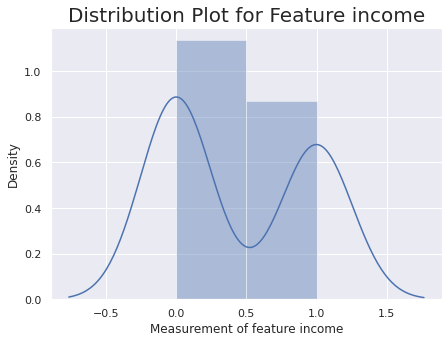

In [118]:
plotDistPlot(train_data,'income')

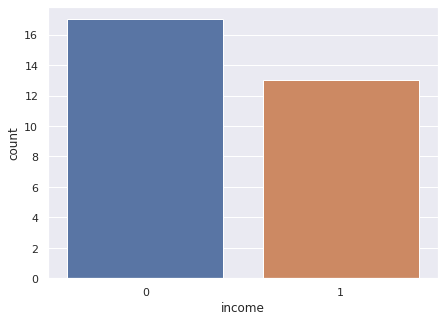

In [119]:
sns.countplot(x='income',data=train_data)

In [120]:
train_data['income'].value_counts()

0    17
1    13
Name: income, dtype: int64